In [1]:
import jieba
from nltk import *
from wordcloud import WordCloud,ImageColorGenerator
import matplotlib.pyplot as plt
import matplotlib
from scipy.misc import imread
import numpy as np

In [2]:
matplotlib.style.use('ggplot')
%matplotlib inline

In [22]:
#停用词
def stopwordslist(filepath):
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='gbk').readlines()]
    return stopwords

In [23]:
stopwords=stopwordslist(r'C:\Users\Chris\Desktop\工作包\信管课件\Untitled Folder\停用词.txt');
stopwords_en=stopwordslist(r'C:\Users\Chris\Desktop\工作包\信管课件\Untitled Folder\英文停用词.txt');

In [24]:
#去除停用词
def cut_move(sentence):
    seg_list=jieba.cut(sentence, cut_all=False, HMM=True)
    outstr = []
    for word in list(seg_list):
        if word not in stopwords:
            outstr.append(word)
    return outstr

In [25]:
#去除停用词
def cut_move_en(sentence):
    seg_list=jieba.cut(sentence, cut_all=False, HMM=True)
    outstr = []
    for word in list(seg_list):
        if word not in stopwords_en:
            outstr.append(word)
    return outstr

C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  del sys.path[0]


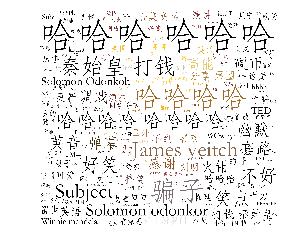

In [16]:
from PIL import Image
words = []
with open('export_dm.txt', 'r') as f:
    for line in f.readlines():
        list_dm=cut_move(line)
        for w in list_dm:
            words.append(w)
f.close()

fdist = FreqDist(words)
fd_sort = sorted(fdist.items(), key=lambda d: d[1],reverse=True)

bimg = imread('github.png')  # 解析该图片


wc1 = WordCloud(
    mask=bimg,
    background_color="white",
    font_path="C:\\Windows\\Fonts\\STFANGSO.ttf",#不加这一句显示口字形乱码
    max_font_size=500,  # 显示字体的最大值
    random_state=42,
    prefer_horizontal=1.0,
    max_words=200,
    scale=4
).generate(' '.join(words))

bimgColors = ImageColorGenerator(bimg)
plt.imshow(wc1.recolor(color_func=bimgColors))
plt.axis("off")
plt.show()
wc2.to_file('export_dm.png')    #图片保存


In [17]:
outputs = open('out1.txt', 'w')
for word in words:
    outputs.write(word + '\n')
outputs.close()
te = []
fp = codecs.open('out1.txt','r')
for line in fp:
    line = line.split()
    te.append([ w for w in line  ])
print (len(te))
dictionary = corpora.Dictionary(te)
corpus = [ dictionary.doc2bow(text) for text in te ]

#tfidf = models.TfidfModel(corpus)
#corpus_tfidf = tfidf[corpus]

#########Run the LDA model for XX topics ###############################
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=2,passes=500) 
doc_topic = [a for a in lda[corpus]]

####### write the topics in file topics_result.txt ####################
topics_r = lda.print_topics(num_topics = 2, num_words = 10)
topic_name = codecs.open('name1.txt','w')
for v in topics_r:
    topic_name.write(str(v)+'\n')

3806


In [19]:
topics_r

[(0,
  '0.100*"哈哈哈" + 0.048*"哈哈哈哈" + 0.024*"骗子" + 0.022*"打钱" + 0.014*"Solomon" + 0.010*"233333" + 0.010*"From" + 0.010*"不好" + 0.009*"说" + 0.009*"笑点"'),
 (1,
  '0.042*"笑" + 0.014*"秦始皇" + 0.011*"To" + 0.011*"No" + 0.010*"James" + 0.008*"Subject" + 0.008*"veitch" + 0.007*"好笑" + 0.007*"哒" + 0.006*"套路"')]

C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if sys.path[0] == '':


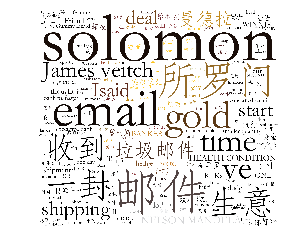

In [27]:
words = []
with open('export.txt', 'r') as f:
    for line in f.readlines():
        list_dm=cut_move_en(line)
        for w in list_dm:
            words.append(w)
f.close()

fdist = FreqDist(words)
fd_sort = sorted(fdist.items(), key=lambda d: d[1],reverse=True)

bimg = imread('github.png')  # 解析该图片


wc2 = WordCloud(
    mask=bimg,
    background_color="white",
    font_path="C:\\Windows\\Fonts\\STFANGSO.ttf",#不加这一句显示口字形乱码
    max_font_size=500,  # 显示字体的最大值
    random_state=42,
    prefer_horizontal=1.0,
    max_words=200,
    scale=4
).generate(' '.join(words))

bimgColors = ImageColorGenerator(bimg)
plt.imshow(wc2.recolor(color_func=bimgColors))
plt.axis("off")
plt.show()
wc2.to_file('export_1.png')    #图片保存

In [9]:
words

['F',
 '月',
 '\n',
 'a',
 ' ',
 'few',
 ' ',
 'years',
 ' ',
 'ago',
 '\n',
 '收到',
 '一封',
 '垃圾邮件',
 '\n',
 'got',
 ' ',
 'one',
 ' ',
 'of',
 ' ',
 'those',
 ' ',
 'spam',
 ' ',
 'emails',
 '\n',
 '垃圾邮件',
 '过器',
 '没起',
 '作用',
 '\n',
 'And',
 ' ',
 'it',
 ' ',
 'managed',
 ' ',
 'to',
 ' ',
 'get',
 ' ',
 'through',
 ' ',
 'my',
 ' ',
 'spam',
 ' ',
 'filter',
 '\n',
 '收件箱',
 '里',
 '\n',
 'I',
 'm',
 ' ',
 'not',
 ' ',
 'quite',
 ' ',
 'sure',
 ' ',
 'how',
 ' ',
 'but',
 ' ',
 'it',
 ' ',
 'turned',
 ' ',
 'up',
 ' ',
 'in',
 ' ',
 'my',
 ' ',
 'inbox',
 '\n',
 '发件人',
 '所罗门',
 '奥东寇',
 '家伏',
 '\n',
 'and',
 ' ',
 'it',
 ' ',
 'was',
 ' ',
 'from',
 ' ',
 'a',
 ' ',
 'guy',
 ' ',
 'called',
 ' ',
 'solomon',
 ' ',
 'Odonkoh',
 '\n',
 '邮件',
 '开头',
 '\n',
 'It',
 ' ',
 'went',
 ' ',
 'like',
 ' ',
 'this',
 '\n',
 '邮件',
 '开澳',
 '\n',
 'nt',
 ' ',
 'wentlike',
 ' ',
 'thiss',
 '\n',
 '\n',
 '\n',
 '止',
 '跪',
 '你好',
 '维奇',
 '\n',
 'itsa',
 '\n',
 'elo',
 ' ',
 'mes',
 ' ',
 've',
 '\n',
 '挺'

In [28]:
import codecs
from gensim import corpora
from gensim.models import LdaModel
from gensim import models
from gensim.corpora import Dictionary

In [29]:
outputs = open('out.txt', 'w')
for word in words:
    outputs.write(word + '\n')
outputs.close()
te = []
fp = codecs.open('out.txt','r')
for line in fp:
    line = line.split()
    te.append([ w for w in line  ])
print (len(te))
dictionary = corpora.Dictionary(te)
corpus = [ dictionary.doc2bow(text) for text in te ]

#tfidf = models.TfidfModel(corpus)
#corpus_tfidf = tfidf[corpus]

#########Run the LDA model for XX topics ###############################
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=2,passes=500) 
doc_topic = [a for a in lda[corpus]]

####### write the topics in file topics_result.txt ####################
topics_r = lda.print_topics(num_topics = 2, num_words = 10)
topic_name = codecs.open('name.txt','w')
for v in topics_r:
    topic_name.write(str(v)+'\n')

4125


In [30]:
topics_r

[(0,
  '0.019*"a" + 0.016*"唯" + 0.016*"爱" + 0.011*"James" + 0.010*"OF" + 0.010*"THE" + 0.010*"MY" + 0.009*"She" + 0.009*"Isaid" + 0.009*"专员"'),
 (1,
  '0.033*"NO" + 0.025*"I" + 0.017*"3000" + 0.017*"毙" + 0.017*"WOMAN" + 0.017*"ONE" + 0.011*"veitch" + 0.010*"银行" + 0.010*"美金" + 0.010*"说"')]

In [ ]:
  
######################  write the class results to file  #########################
###################### each document belongs to which topic ######################

fp2 = codecs.open('output/documents_result.txt','w')
for t in doc_topic:
    c = []
    c.append([a[1] for a in t])
    m = max(c[0])
    
    for i in range(0, len(t)):
        if m in t[i]:
            #print(t[i])
            fp2.write(str(t[i][0]) + '  ' + str(t[i][1]) + '\n')
            break
################################ OVER ############################################